## Getting data for our model
we will get our data from carwale.com, first of all we will get top 500 cities list in india, because we it's easier to get top 25-30 data from each city then to get a lot from same city.  
and then we will go thru the page of each city and scrap top 20-35 results... we might also fail to scrap from pages of some cities. but since they will be minority, we can ignore them.

In [ ]:
from bs4 import BeautifulSoup
import requests, certifi
import json
import pandas

CARDATA = []

indian_cities_500 = ['palghar', 'aligarh', 'siwan', 'jammu', 'junagadh', 'shajapur', 'angul', 'kendrapara', 'vizianagaram', 'ahmedabad', 'darbhanga', 'vidisha', 'bengaluru', 'azamgarh', 'kutch', 'koppal', 'pali', 'lucknow', 'amravati', 'madanapalle', 'latur', 'bahraich', 'bharuch', 'palgharmumbai', 'morbi', 'muzaffarnagar', 'manendragarh', 'patna', 'fatehpur', 'satna', 'churu', 'parbhani', 'bijnor', 'subarnapur', 'farrukhabad', 'bargarh', 'satara', 'banaskantha', 'kannauj', 'dhenkanal', 'devbhoomiDwarka', 'jalna', 'ongole', 'tiruppur', 'khammam', 'tonk', 'kollam', 'nanded', 'karimnagar', 'neemuch', 'basti', 'chhapra', 'ramanagara', 'jalgaon', 'jabalpur', 'telangana', 'shivpuri', 'chittorgarh', 'raisen', 'badaun', 'sagar', 'hapur', 'mysore', 'dakshinakannada', 'madurai', 'visakhapatnam', 'adilabad', 'chandauli', 'udupi', 'ankleshwar', 'kolkata', 'lakhimpur', 'katni', 'dongargarh', 'barmer', 'chennai', 'raigad', 'surat', 'hingoli', 'khurda', 'betul', 'mandsaur', 'bastar', 'narsinghpur', 'tirunelveli', 'aurangabad', 'bulandshahr', 'allahabad', 'wardha', 'mahoba', 'davangere', 'etawah', 'malegaon', 'mandya', 'nandurbar', 'buldhana', 'chandigarh', 'jalore', 'nalgonda', 'gonda', 'amritsar', 'solapur', 'warangal', 'coimbatore', 'barabanki', 'ambikapur', 'jamui', 'ghazipur', 'jhunjhunu', 'yavatmal', 'kanpurdehat', 'rajahmundry', 'chikkaballapur', 'hazaribagh', 'amethi', 'silvassa', 'kawardha', 'kodagu', 'bikaner', 'chamarajanagar', 'korba', 'giridih', 'chittoor', 'chhatarpur', 'gaya', 'karwar', 'kushinagar', 'gadag', 'sirohi', 'mathura', 'shravasti', 'karaikal', 'mysuru', 'bhilai', 'pakur', 'haveri', 'navsari', 'osmanabad', 'purnia', 'jodhpur', 'kasganj', 'daltonganj', 'tikamgarh', 'gorakhpur', 'rampur', 'sitapur', 'dewas', 'cuttack', 'rohtak', 'baripada', 'sambalpur', 'dhar', 'bokaro', 'rourkela', 'bhiwandi', 'koraput', 'mahasamund', 'gadchiroli', 'sangli', 'gurgaon', 'pratapgarh', 'faridabad', 'mumbai', 'nagaur', 'burhanpur', 'ratlam', 'uttarakannada', 'nellimarla', 'meerut', 'rewa', 'botad', 'saharanpur', 'hoshangabad', 'damoh', 'deoria', 'kochi', 'sehore', 'bhilwara', 'gwalior', 'kurnool', 'kolhapur', 'gandhinagar', 'dehradun', 'porbandar', 'ludhiana', 'rajsamand', 'sonbhadra', 'panipat', 'chikmagalur', 'agar', 'akola', 'asansol', 'machilipatnam', 'belagavi', 'belgaum', 'udaipur', 'simdega', 'dhanbad', 'westgodavari', 'kadapa', 'puri', 'ashoknagar', 'bangalore', 'durgapur', 'jeypore', 'ramgarh', 'tumkur', 'rangareddy', 'bundi', 'shimoga', 'sasaram', 'mahe', 'mau', 'dumka', 'jaisalmer', 'maharajganj', 'champa', 'budaun', 'siddharthnagar', 'bharatpur', 'ajmer', 'vijayawada', 'nellore', 'delhi', 'girSomnath', 'chhindwara', 'baloda', 'salem', 'bhiwani', 'yanam', 'begusarai', 'nabrangpur', 'jhansi', 'puducherry', 'banda', 'munger', 'nashik', 'nuapada', 'auraiya', 'dhule', 'arrah', 'rajmahal', 'ahmednagar', 'shivamogga', 'moradabad', 'panna', 'surajpur', 'eastgodavari', 'jagdalpur', 'katihar', 'pithampur', 'mainpuri', 'nalanda', 'rayagada', 'agra', 'medininagar', 'bhubaneswar', 'ballia', 'kanpur', 'jamnagar', 'balod', 'mandla', 'pune', 'seoni', 'raipur', 'krishna', 'koderma', 'jalaun', 'umaria', 'ranchi', 'raichur', 'karauli', 'varanasi', 'chirmiri', 'alirajpur', 'amreli', 'baghpat', 'nizamabad', 'noida', 'datia', 'khargone', 'balasore', 'mehsana', 'bokarosteelcity', 'sikar', 'prakasam', 'hardoi', 'kolar', 'latehar', 'khandwa', 'raebareli', 'pilibhit', 'srikakulam', 'guwahati', 'sindhudurg', 'sabarkantha', 'dindori', 'mirzapur', 'panchmahal', 'medak', 'jaipur', 'sultanpur', 'balrampur', 'mahabubnagar', 'rajgarh', 'ratnagiri', 'diu', 'unnao', 'chitrakoot', 'thane', 'kota', 'buxar', 'jamalpur', 'jhabua', 'lohardaga', 'hubli', 'guntur', 'jajpur', 'beed', 'chapra', 'deoghar', 'eluru', 'hosur', 'palasa', 'firozabad', 'ambala', 'gulbarga', 'bhavnagar', 'raigarh', 'chitradurga', 'ayodhya', 'dholpur', 'barwani', 'jalandhar', 'nayagarh', 'howrah', 'jaunpur', 'godda', 'nellai', 'gopalpur', 'bareilly', 'bilaspur', 'rajkot', 'maheshtala', 'gondia', 'valsad', 'surendranagar', 'durg', 'sidhi', 'etah', 'singrauli', 'bhopal', 'ghaziabad', 'kanpurnagar', 'baleshwar', 'vadodara', 'kakinada', 'chandrapur', 'srinagar', 'indore', 'shahjahanpur', 'bijapur', 'alwar', 'anuppur', 'nagpur', 'tirupati', 'davanagere', 'bhagalpur', 'lalitpur', 'washim', 'muzaffarpur', 'ujjain', 'sawaiMadhopur', 'samastipur', 'siliguri', 'hamirpur', 'naviMumbai', 'bhind', 'bhandara', 'bellary', 'chaibasa', 'hassan', 'motihari', 'keonjhar', 'suryapet', 'morena', 'bagalkot', 'anantapur', 'hyderabad', 'guna', 'shamli', 'daman', 'tiruchirappalli']


browser = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

for city in (indian_cities_500):
    try:
        req = requests.get('https://www.carwale.com/used/' + city + '/', stream=True, headers=browser, verify=certifi.where()).text

        soup = BeautifulSoup(req)
        try:
            jsonList = soup.head.find_all('script')[0].text

            carDict = json.loads(jsonList)

            # print(jsonList)

            listCar = carDict['@graph'][0]['itemListElement']
            for car in listCar:
                title = car["name"]
                model = car["model"]
                vehicleDate = car["vehicleModelDate"]
                price = car["offers"]["price"]
                brand = car["Brand"]["name"]
                kmDriven = car["mileageFromOdometer"]["value"]
                fuelType = car["fuelType"]
                bodyType = car["bodyType"]
                seatCap = car["seatingCapacity"]
                prevOwns = car["numberOfPreviousOwners"]
                transmission = car["vehicleTransmission"]

                CARDATA.append([title, model, vehicleDate, price, brand, kmDriven, fuelType, bodyType, seatCap, prevOwns, transmission, city])

            print(city + " done!")
        except:
            jsonList = soup.head.find_all('script')[1].text

            carDict = json.loads(jsonList)

            # print(jsonList)

            listCar = carDict['@graph'][0]['itemListElement']
            for car in listCar:
                title = car["name"]
                model = car["model"]
                vehicleDate = car["vehicleModelDate"]
                price = car["offers"]["price"]
                brand = car["Brand"]["name"]
                kmDriven = car["mileageFromOdometer"]["value"]
                fuelType = car["fuelType"]
                bodyType = car["bodyType"]
                seatCap = car["seatingCapacity"]
                prevOwns = car["numberOfPreviousOwners"]
                transmission = car["vehicleTransmission"]

                CARDATA.append([title, model, vehicleDate, price, brand, kmDriven, fuelType, bodyType, seatCap, prevOwns, transmission, city])

            print(city + " done!")
    except:
        print(city + " failed!")


tableCar = pandas.DataFrame(CARDATA, columns=['Name','Model','Date of assembly', 'Price', 'Brand', 'KM Driven', 'Fuel Type', 'Body Type', 'Seat capicity', 'No. of prev owners', 'Transmission', 'city'])

print(CARDATA[0], "and", len(CARDATA) - 1, "more")
tableCar.to_csv('CarData.csv', index=False)


palghar done!
aligarh done!
siwan done!
jammu done!
junagadh done!
shajapur done!
angul done!
kendrapara done!
vizianagaram done!
ahmedabad done!
darbhanga done!
vidisha done!
bengaluru done!
azamgarh done!
kutch done!
koppal done!
pali done!
lucknow done!
amravati done!
madanapalle done!
latur done!
bahraich done!
bharuch done!
palgharmumbai failed!
morbi done!
muzaffarnagar done!
manendragarh done!
patna done!
fatehpur done!
satna done!
churu done!
parbhani done!
bijnor done!
subarnapur failed!
farrukhabad done!
bargarh done!
satara done!
banaskantha done!
kannauj done!
dhenkanal done!
devbhoomiDwarka failed!
jalna done!
ongole done!
tiruppur done!
khammam done!
tonk done!
kollam done!
nanded done!
karimnagar done!
neemuch done!
basti done!
chhapra done!
ramanagara done!
jalgaon done!
jabalpur done!
telangana failed!
shivpuri done!
chittorgarh done!
raisen done!
badaun done!
sagar done!
hapur done!
mysore done!
dakshinakannada failed!
madurai done!
visakhapatnam done!
adilabad done!


### 8718 total examples...
so now that we have scrapped data, we need to make it trainable data. i.e., by cleaning and changing data value type. like each brand gets a number, so on...  

### Cleaning data
this will be the structure of our numpy array which will be used for training:  
|age|brand|kmDriven|fuelType|bodyType|seatCap|Owners|transmission|city|
|---|-----|--------|--------|--------|-------|------|------------|----|
|2|12|20569|3|2|5|2|1|152|

so here's our idea to clean this data.  
first we will make a list of all the unique brands, body types, transmission types, etc...  
then we will arrange them such that their (position +1) is the point or weight (kind of) they hold in determining price of car.  
so now we will have all of this data in numeric form which can be converted into a numpy array.

37
9
14
7
8
347


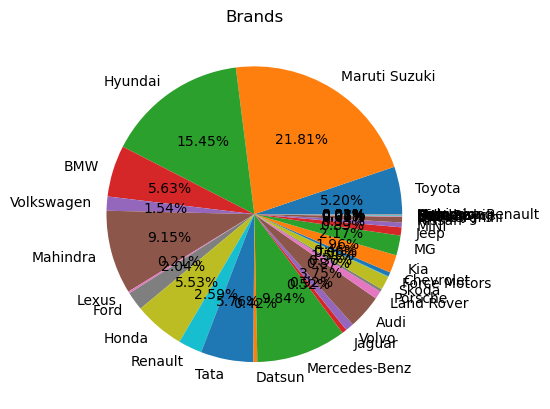

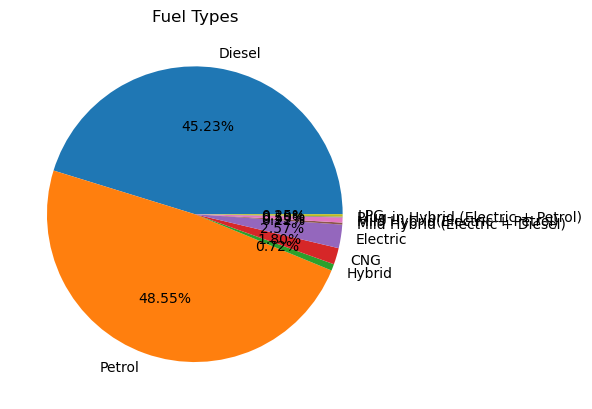

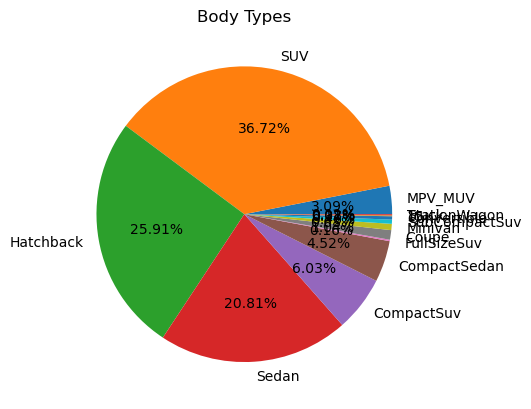

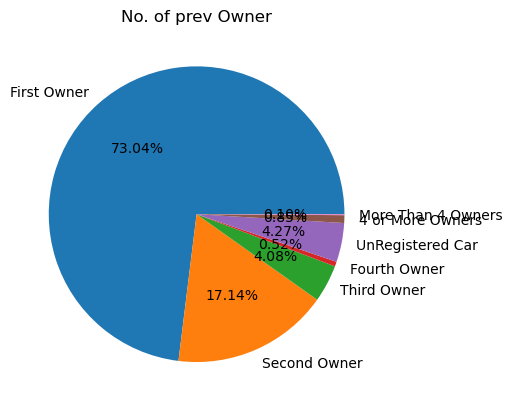

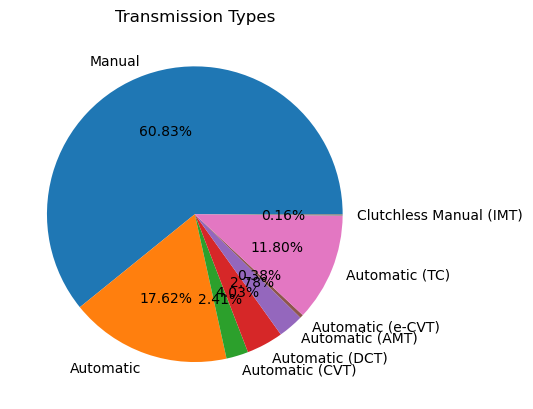

In [35]:
import numpy as np
import pandas
import matplotlib.pyplot as plt


dff = pandas.read_csv('CarData.csv')
brands = []
brandsF = np.ones(37)
fuelTypes = []
fuelTypesF = np.ones(9)
bodyTypes = []
bodyTypesF = np.ones(14)
ownerTypes = []
ownerTypesF = np.ones(7)
transmissionTypes = []
transmissionTypesF = np.ones(8)
cities = []
citiesF = np.ones(347)

for index, carr in dff.iterrows():
    if carr['Brand'] not in brands:
        brands.append(carr['Brand'])
    else:
        brandsF[brands.index(carr['Brand'])] += 1
    if carr['Fuel Type'] not in fuelTypes:
        fuelTypes.append(carr['Fuel Type'])
    else:
        fuelTypesF[fuelTypes.index(carr['Fuel Type'])] += 1
    if carr['Body Type'] not in bodyTypes:
        bodyTypes.append(carr['Body Type'])
    else:
        bodyTypesF[bodyTypes.index(carr['Body Type'])] += 1
    if carr['No. of prev owners'].strip() not in ownerTypes:
        ownerTypes.append(carr['No. of prev owners'].strip())
    else:
        ownerTypesF[ownerTypes.index(carr['No. of prev owners'].strip())] += 1
    if carr['Transmission'] not in transmissionTypes:
        transmissionTypes.append(carr['Transmission'])
    else:
        transmissionTypesF[transmissionTypes.index(carr['Transmission'])] += 1
    if carr['city'] not in cities:
        cities.append(carr['city'])
    else:
        citiesF[cities.index(carr['city'])] += 1

    if carr['No. of prev owners'] == '4 or More Owners':
        carr['No. of prev owners'] = "More Than 4 Owners"

print(len(brands))
print(len(fuelTypes))
print(len(bodyTypes))
print(len(ownerTypes))
print(len(transmissionTypes))
print(len(cities))

plt.figure(1)
plt.pie(brandsF, labels=brands, autopct='%.2f%%')
plt.title("Brands")

plt.figure(2)
plt.pie(fuelTypesF, labels=fuelTypes, autopct='%.2f%%')
plt.title("Fuel Types")

plt.figure(3)
plt.pie(bodyTypesF, labels=bodyTypes, autopct='%.2f%%')
plt.title("Body Types")

plt.figure(4)
plt.pie(ownerTypesF, labels=ownerTypes, autopct='%.2f%%')
plt.title("No. of prev Owner")

plt.figure(5)
plt.pie(transmissionTypesF, labels=transmissionTypes, autopct='%.2f%%')
plt.title("Transmission Types")

plt.show()


In [55]:

# all these arrangements are ascending order, i.e., first type is least while last one is most expensive, so our model will pick some +ve weights for them
brands_sorted_by_price = [
    "Datsun", "Force Motors", "Mahindra-Renault", "Ssangyong", "Fiat", "Chevrolet",
    "Tata", "Maruti Suzuki", "Mahindra", "Hyundai", "Renault", "Honda", "Nissan", "Ford",
    "Kia", "MG", "Skoda", "Volkswagen", "Citroen", "Isuzu", "BYD",
    "Toyota", "Mitsubishi", "MINI", "Jeep",
    "Volvo", "Lexus", "Jaguar", "Land Rover",
    "Audi", "BMW", "Mercedes-Benz",
    "Porsche", "Bentley", "Rolls-Royce", "Lamborghini", "Hummer"
]
fuels_sorted_by_price = [
    "LPG",  
    "CNG",  
    "Petrol",  
    "Diesel",  
    "Electric",  
    "Hybrid",  
    "Mild Hybrid (Electric + Diesel)",  
    "Mild Hybrid(Electric + Petrol)",  
    "Plug-in Hybrid (Electric + Petrol)"
]
bodytype_sorted_by_price = [
    "Hatchback",  
    "CompactSedan",  
    "SubCompactSuv",  
    "CompactSuv",  
    "Sedan",  
    "MPV_MUV",  
    "Minivan",  
    "SUV",  
    "StationWagon",  
    "Truck",  
    "FullSizeSuv",  
    "Coupe",  
    "Convertible",  
    "15"   # unclear category, but if it means 15-seater / tempo traveller → very expensive
]
transmission_sorted_by_price = [
    "Manual",  
    "Clutchless Manual (IMT)",  
    "Automatic (AMT)",  
    "Automatic (CVT)",  
    "Automatic (TC)",  
    "Automatic (e-CVT)",  
    "Automatic (DCT)",  
    "Automatic"
]
ownerSorted = [
    'First Owner',
    'Second Owner', 
    'Third Owner', 
    'Fourth Owner', 
    '4 or More Owners',
    'More Than 4 Owners',
    'UnRegistered Car'
]
print(len(brands_sorted_by_price), len(fuels_sorted_by_price), len(bodytype_sorted_by_price), len(transmission_sorted_by_price))

DATACAR = np.zeros((len(dff), 9))

for indexx, cars in dff.iterrows():
    # DATACAR[indexx]
    DATACAR[indexx, 0] = 2025 - cars['Date of assembly'] #age
    DATACAR[indexx, 1] = brands_sorted_by_price.index(cars['Brand']) + 1 #brand
    DATACAR[indexx, 2] = cars['KM Driven'] #km driven
    DATACAR[indexx, 3] = fuels_sorted_by_price.index(cars['Fuel Type']) + 1 #fuel type
    DATACAR[indexx, 4] = bodytype_sorted_by_price.index(cars['Body Type']) #body type
    DATACAR[indexx, 5] = cars['Seat capicity'] #seat cap
    DATACAR[indexx, 6] = transmission_sorted_by_price.index(cars['Transmission']) #transmission type
    DATACAR[indexx, 7] = ownerSorted.index(cars['No. of prev owners'].strip()) + 1 # no. of prev owners
    DATACAR[indexx, 8] = cars['Price']

FINALDF = pandas.DataFrame(DATACAR, columns=['age', 'brand', 'kmdriven', 'fuelType', 'bodyType', 'seatCap', 'transmission', 'owners', 'price'])

FINALDF.to_csv('CleanDataNP.csv', index=False)

37 9 14 8
